In [773]:
from ucimlrepo import fetch_ucirepo 
  
  
# fetch dataset 
sepsis_survival_minimal_clinical_records = fetch_ucirepo(id=827) 
  
# data (as pandas dataframes) 
X = sepsis_survival_minimal_clinical_records.data.features 
y = sepsis_survival_minimal_clinical_records.data.targets 
  
# metadata 
print(sepsis_survival_minimal_clinical_records.metadata) 
  
# variable information 
print(sepsis_survival_minimal_clinical_records.variables) 



{'uci_id': 827, 'name': 'Sepsis Survival Minimal Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/827/sepsis+survival+minimal+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/827/data.csv', 'abstract': 'The dataset consists of 110,204 admissions of 84,811 hospitalized subjects between 2011 and 2012 in Norway who were diagnosed with infections, systemic inflammatory response syndrome, sepsis by causative microbes, or septic shock.  The prediction task is to determine whether a patient survived or is deceased at a time of about 9 days after collecting their medical record at the hospital.\n\nThis is an important prediction problem in clinical medicine. Sepsis is a life-threatening condition triggered by an immune overreaction to infection, leading to organ failure or even death. Sepsis is associated with immediate death risk, often killing patients within one hour. This renders many laboratory tests and hospital analyses impractical for t

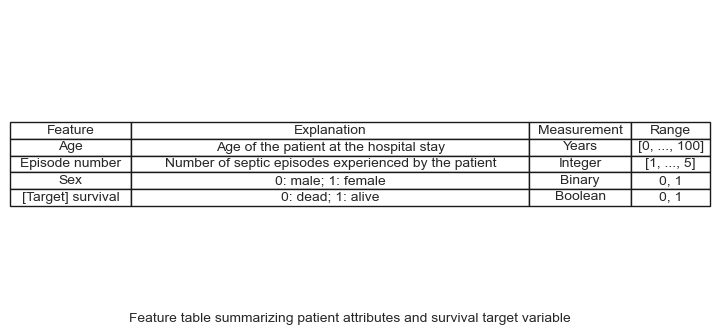

In [774]:
import matplotlib.pyplot as plt
import pandas as pd

# Table data
data = [
    ["Age", "Age of the patient at the hospital stay", "Years", "[0, ..., 100]"],
    ["Episode number", "Number of septic episodes experienced by the patient", "Integer", "[1, ..., 5]"],
    ["Sex", "0: male; 1: female", "Binary", "0, 1"],
    ["[Target] survival", "0: dead; 1: alive", "Boolean", "0, 1"]
]

columns = ["Feature", "Explanation", "Measurement", "Range"]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Plot table
fig, ax = plt.subplots(figsize=(8, 4))  # Set figure size
ax.axis('off')  # Hide axes
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Format table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(df.columns))))

# Add caption
plt.figtext(0.5, 0.1, "Feature table summarizing patient attributes and survival target variable", 
            wrap=True, horizontalalignment='center', fontsize=10)

# Display the table
plt.show()


In [775]:
import pandas as pd
df = pd.concat([X, y], axis=1)

df.rename(columns={
    'age_years': 'Age',
    'sex_0male_1female': 'Sex',
    'episode_number': 'Episode_Number',
    'hospital_outcome_1alive_0dead': 'Hospital_Outcome'
}, inplace=True)

df.head(5)

,Age,Sex,Episode_Number,Hospital_Outcome
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [776]:
df.shape

(110341, 4)

In [777]:
rows, columns = df.shape
df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")
print(df.dtypes)
print(df.describe())

Number of rows: 110341
Number of columns: 4
Age                 int64
Sex                 int64
Episode_Number      int64
Hospital_Outcome    int64
dtype: object
                 Age            Sex  Episode_Number  Hospital_Outcome
count  110341.000000  110341.000000   110341.000000     110341.000000
mean       62.731288       0.473786        1.349145          0.926328
std        24.118424       0.499315        0.751472          0.261237
min         0.000000       0.000000        1.000000          0.000000
25%        51.000000       0.000000        1.000000          1.000000
50%        68.000000       0.000000        1.000000          1.000000
75%        81.000000       1.000000        1.000000          1.000000
max       100.000000       1.000000        5.000000          1.000000


In [778]:
print(sepsis_survival_minimal_clinical_records.variables) 

                            name     role     type demographic  \
0                      age_years  Feature  Integer         Age   
1              sex_0male_1female  Feature   Binary      Gender   
2                 episode_number  Feature  Integer        None   
3  hospital_outcome_1alive_0dead   Target   Binary        None   

                                         description  units missing_values  
0                       Age of the patient in years.  years             no  
1  Gender of the patient. Values are encoded as f...   None             no  
2                    Number of prior Sepsis episodes   None             no  
3  Status of the patient after 9,351 days of bein...   None             no  


In [779]:
sepsis_survival_minimal_clinical_records.variables


,name,role,type,demographic,description,units,missing_values
0,age_years,Feature,Integer,Age,Age of the patient in years.,years,no
1,sex_0male_1female,Feature,Binary,Gender,Gender of the patient. Values are encoded as f...,None,no
2,episode_number,Feature,Integer,None,Number of prior Sepsis episodes,None,no
3,hospital_outcome_1alive_0dead,Target,Binary,None,"Status of the patient after 9,351 days of bein...",None,no


In [780]:
y = df['Hospital_Outcome']
X = df.drop(columns=['Hospital_Outcome'])

# print(df['Age'].describe())
print("\n")
print(df['Age'].value_counts())



Age
82     2666
84     2623
81     2541
83     2524
80     2521
       ... 
10      159
14      153
13      151
100     128
99       84
Name: count, Length: 101, dtype: int64


In [781]:
print(df['Sex'].value_counts())

Sex
0    58063
1    52278
Name: count, dtype: int64


In [782]:
# print(df['Episode_Number'].describe())
print("\n")
print(df['Episode_Number'].value_counts())



Episode_Number
1    84926
2    16710
3     5403
4     2199
5     1103
Name: count, dtype: int64


In [783]:
print(y.value_counts())

Hospital_Outcome
1    102212
0      8129
Name: count, dtype: int64


In [784]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

Age                 0
Sex                 0
Episode_Number      0
Hospital_Outcome    0
dtype: int64


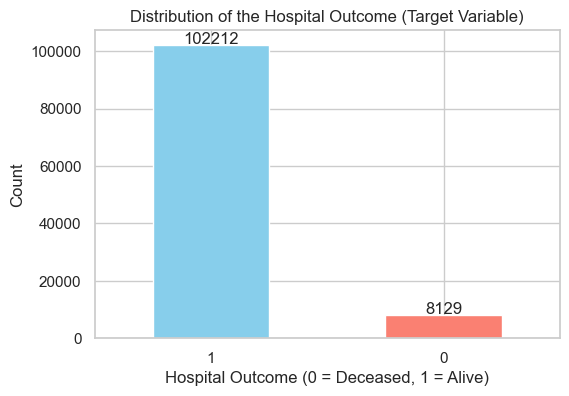

In [785]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
ax = y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')
    
    

# Set title and labels
plt.title('Distribution of the Hospital Outcome (Target Variable)')
plt.xlabel('Hospital Outcome (0 = Deceased, 1 = Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


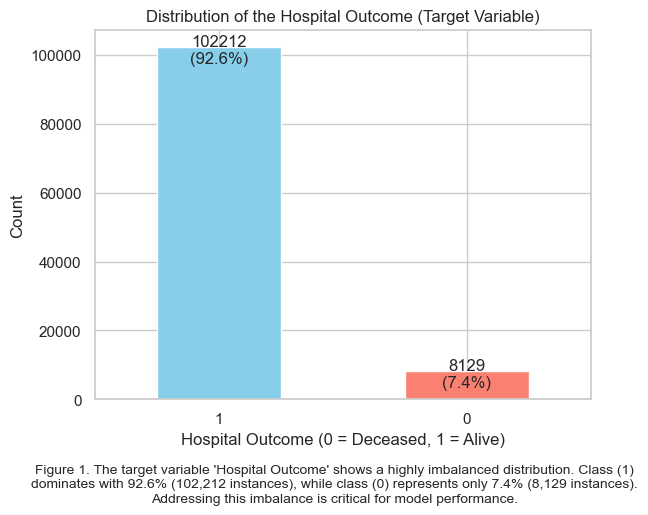

In [789]:
import matplotlib.pyplot as plt


# Calculate the total number of instances to compute percentages
total_count = len(y)

# Plot the distribution of the target variable
plt.figure()
ax = y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

# Add count and percentage labels on top of each bar
for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total_count
    ax.annotate(f'{count}\n({percentage:.1f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -2), textcoords='offset points')

# Set title and labels
plt.title('Distribution of the Hospital Outcome (Target Variable)')
plt.xlabel('Hospital Outcome (0 = Deceased, 1 = Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)


# Add a caption using figtext
caption = ("Figure 1. The target variable 'Hospital Outcome' shows a highly imbalanced distribution. "
           "Class (1) dominates with 92.6% (102,212 instances), while class (0) "
           "represents only 7.4% (8,129 instances). Addressing this imbalance is critical for model performance.")
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=10)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "y_distribution.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')

plt.show()



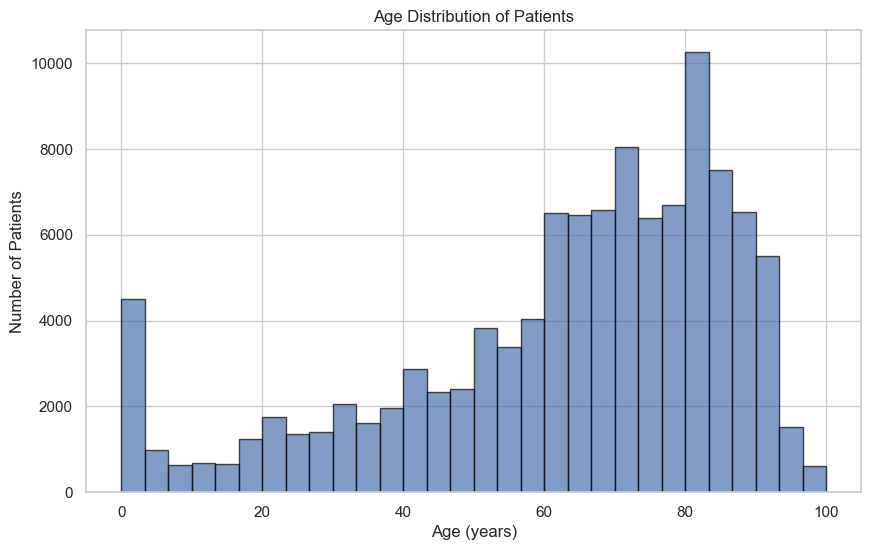

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
# plt.title('Age Distribution of Patients')
# plt.xlabel('Age (years)')
# plt.ylabel('Number of Patients')
# plt.show()


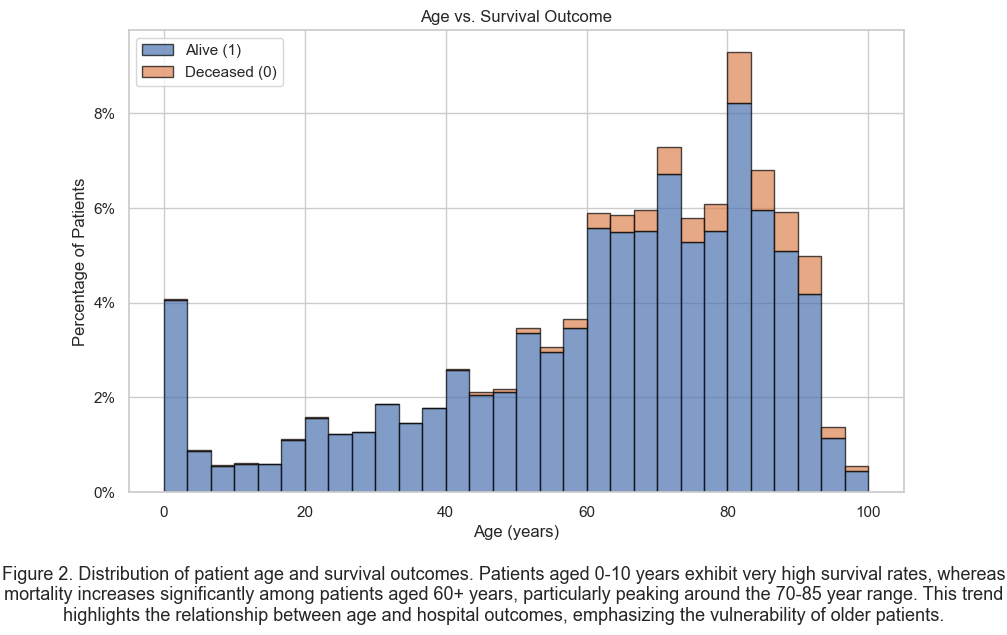

In [799]:
import numpy as np
import matplotlib.pyplot as plt

# Split the data based on survival outcome
alive = df[df['Hospital_Outcome'] == 1]['Age']
deceased = df[df['Hospital_Outcome'] == 0]['Age']

# Create the stacked histogram
plt.figure(figsize=(10, 6))

# Calculate weights for each group to normalize to percentages
weights_alive = np.ones(len(alive)) / len(df)
weights_deceased = np.ones(len(deceased)) / len(df)

plt.hist([alive, deceased], bins=30, edgecolor='black', alpha=0.7, 
         stacked=True, label=['Alive (1)', 'Deceased (0)'], 
         weights=[weights_alive, weights_deceased])

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add titles and labels
plt.title('Age vs. Survival Outcome')
plt.xlabel('Age (years)')
plt.ylabel('Percentage of Patients')
plt.legend()



# Add a caption using figtext
caption = ("Figure 2. Distribution of patient age and survival outcomes. Patients aged 0-10 years exhibit very high survival rates, whereas mortality increases significantly among patients aged 60+ years, particularly peaking around the 70-85 year range. This trend highlights the relationship between age and hospital outcomes, emphasizing the vulnerability of older patients.")
plt.figtext(0.5, -0.1, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "age_y_distribution.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')

plt.show()



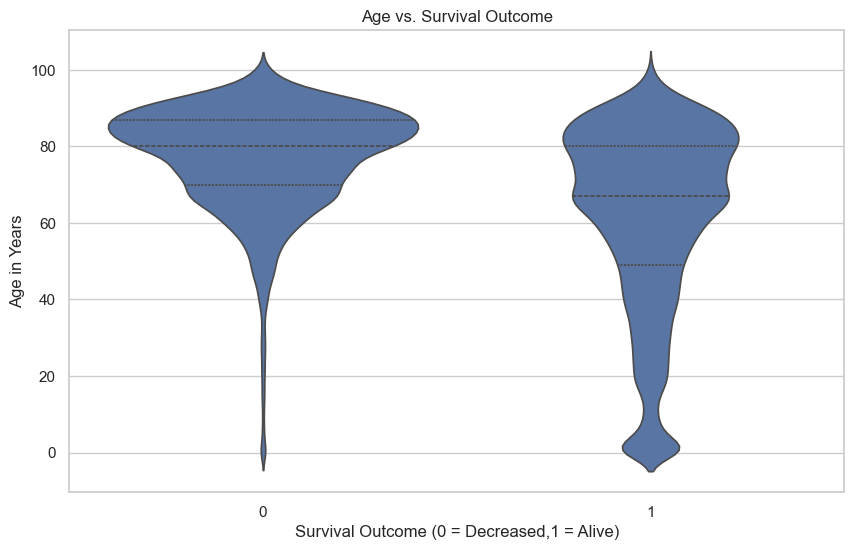

In [636]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
# Violin plot for Age Distribution vs. Survival Outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='Hospital_Outcome', y='Age', data=df, inner='quartile')
plt.title('Age vs. Survival Outcome')
plt.xlabel('Survival Outcome (0 = Decreased,1 = Alive)')
plt.ylabel('Age in Years')
plt.show()

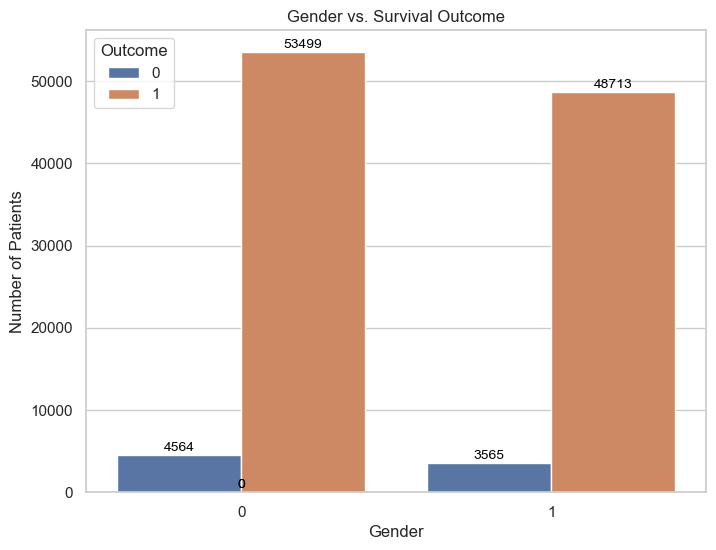

In [637]:
# Map binary codes to meaningful labels
# df['Gender'] = df['Sex'].map({0: 'Male', 1: 'Female'})
# df['Outcome'] = df['Hospital_Outcome'].map({1: 'Survived', 0: 'Deceased'})

# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x=df['Sex'], hue=df['Hospital_Outcome'])

# Add titles and labels
plt.title('Gender vs. Survival Outcome')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Outcome')

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()



#pie chat

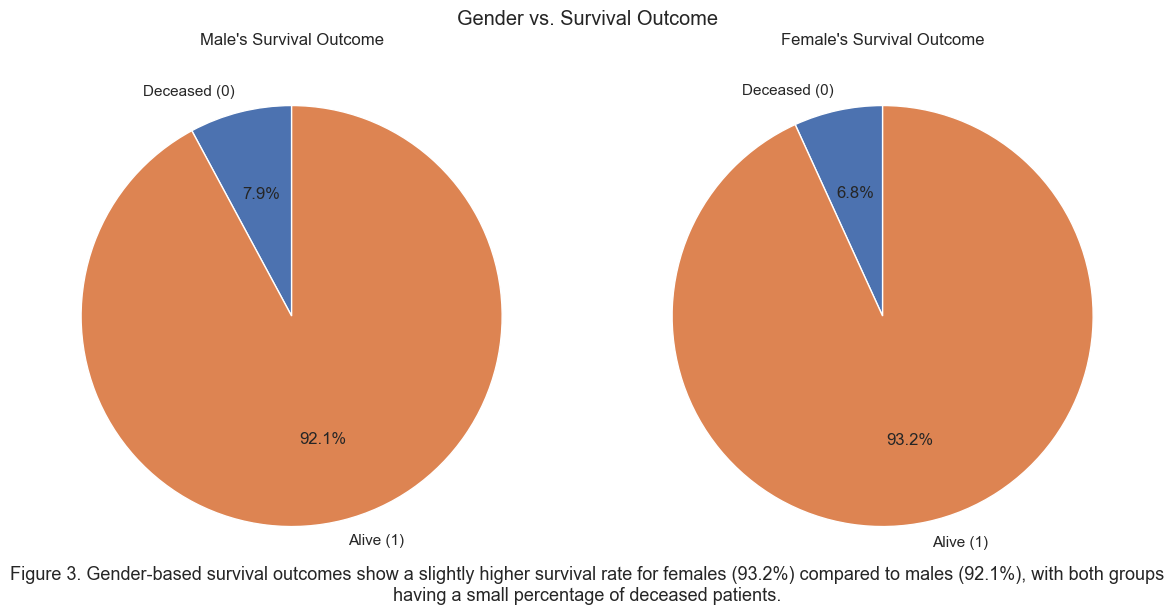

In [806]:
import matplotlib.pyplot as plt

# Group data by gender and survival outcome
gender_outcome_counts = df.groupby(['Sex', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Labels for the pie chart
outcome_labels = ['Deceased (0)', 'Alive (1)']
gender_labels = ['Male', 'Female']

# Create a figure with two subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart for males (0)
ax1.pie(gender_outcome_counts.loc[0], labels=outcome_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title("Male's Survival Outcome")

# Plot the pie chart for females (1)
ax2.pie(gender_outcome_counts.loc[1], labels=outcome_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title("Female's Survival Outcome")

# Add a main title
plt.suptitle('Gender vs. Survival Outcome')


# Add a caption using figtext
caption = ("Figure 3. Gender-based survival outcomes show a slightly higher survival rate for females (93.2%) compared to males (92.1%), with both groups having a small percentage of deceased patients.")
plt.figtext(0.5, 0, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "gender_y_distribution.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')


# Show the plot
plt.tight_layout()
plt.show()


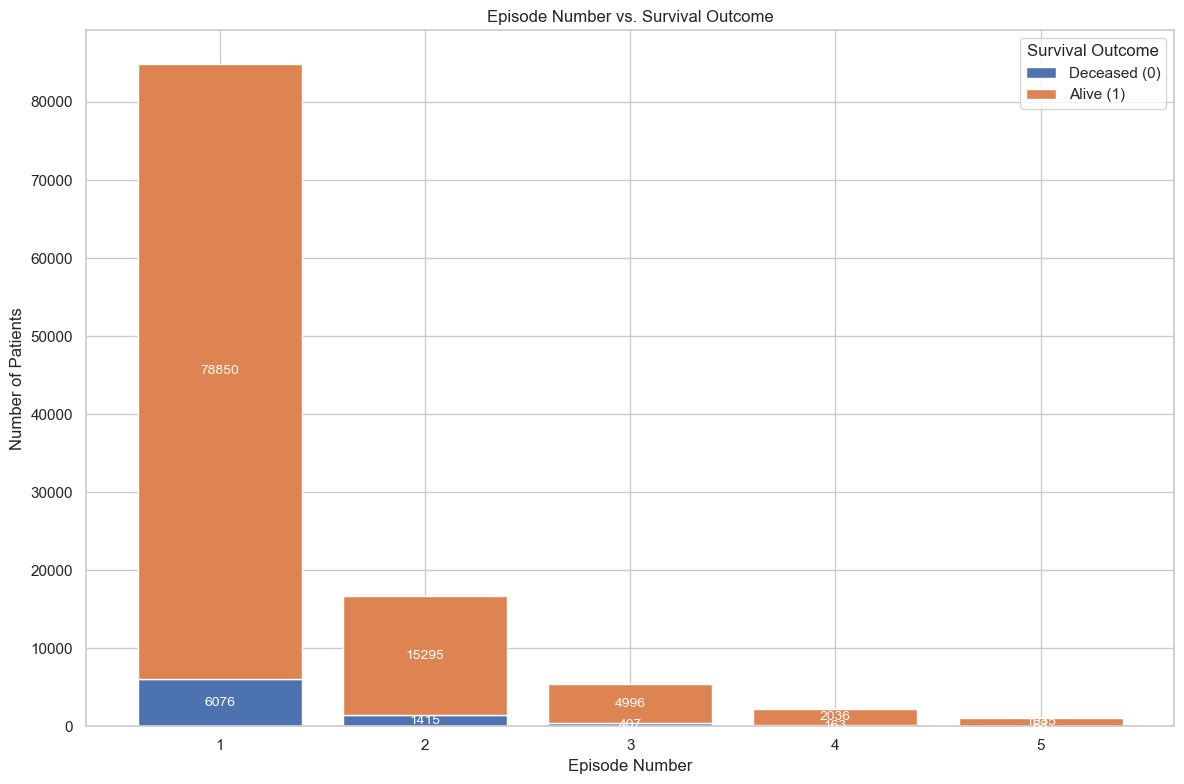

In [802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'Episode_Number' and 'Hospital_Outcome' and count occurrences
episode_outcome_counts = df.groupby(['Episode_Number', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(12, 8))
bars = episode_outcome_counts.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())

# Add titles and labels
plt.title('Episode Number vs. Survival Outcome')
plt.xlabel('Episode Number')
plt.ylabel('Number of Patients')
plt.legend(title='Survival Outcome', labels=['Deceased (0)', 'Alive (1)'])
plt.xticks(rotation=360)

# Add labels on top of each bar
for i in range(len(episode_outcome_counts)):
    total = 0
    for j in range(len(episode_outcome_counts.columns)):
        count = episode_outcome_counts.iloc[i, j]
        total += count
        if count > 0:  # Only add labels for non-zero counts
            plt.text(i, total - count / 2, str(count), ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

# percentage staked bar plot


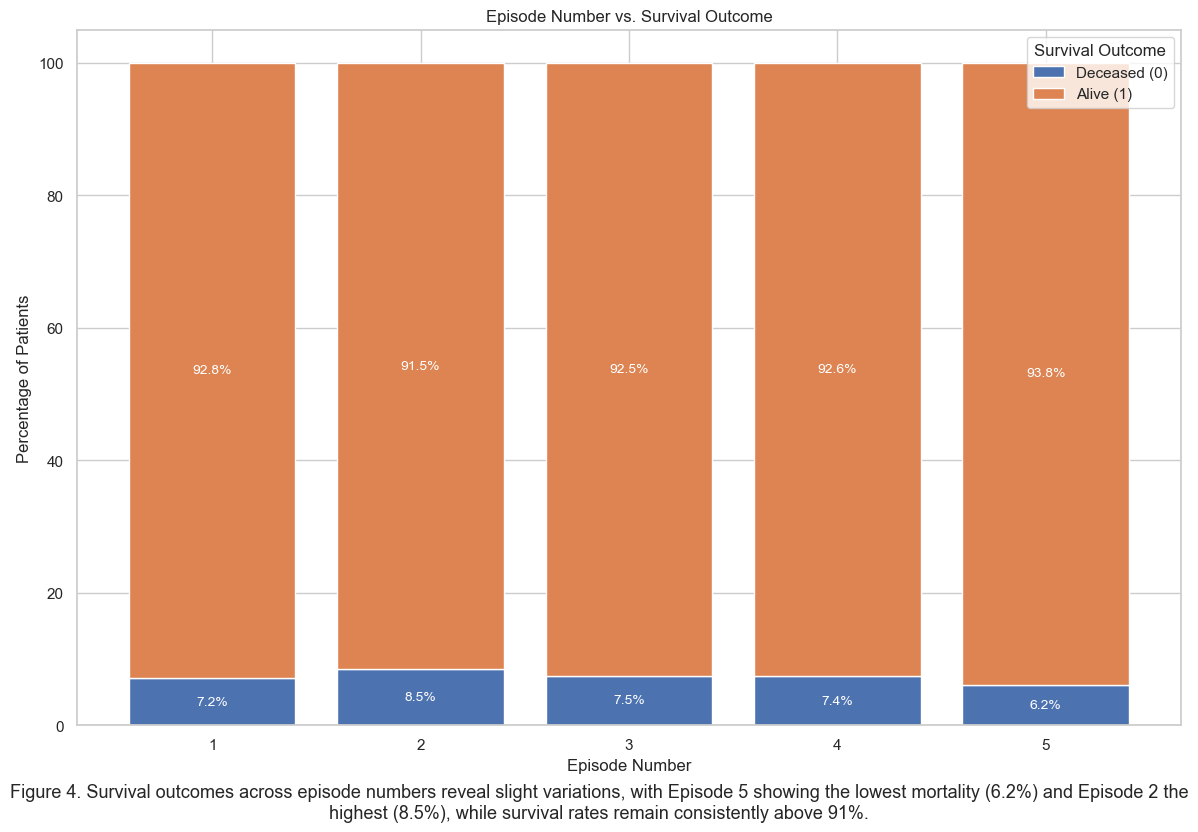

In [811]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Group the data by 'Episode_Number' and 'Hospital_Outcome' and count occurrences
episode_outcome_counts = df.groupby(['Episode_Number', 'Hospital_Outcome']).size().unstack(fill_value=0)

# Convert the counts to percentages
episode_outcome_percentages = episode_outcome_counts.div(episode_outcome_counts.sum(axis=1), axis=0) * 100

# Create a percentage stacked bar plot
plt.figure(figsize=(12, 8))
bars = episode_outcome_percentages.plot(kind='bar', stacked=True, width=0.8, ax=plt.gca())

# Add titles and labels
plt.title('Episode Number vs. Survival Outcome')
plt.xlabel('Episode Number')
plt.ylabel('Percentage of Patients')
plt.legend(title='Survival Outcome', labels=['Deceased (0)', 'Alive (1)'])
plt.xticks(rotation=360)

# Add percentage labels on top of each bar
for i in range(len(episode_outcome_percentages)):
    total = 0
    for j in range(len(episode_outcome_percentages.columns)):
        percentage = episode_outcome_percentages.iloc[i, j]
        total += percentage
        if percentage > 0:  # Only add labels for non-zero percentages
            plt.text(i, total - percentage / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=10, color='white')


# Add a caption using figtext
caption = ("Figure 4. Survival outcomes across episode numbers reveal slight variations, with Episode 5 showing the lowest mortality (6.2%) and Episode 2 the highest (8.5%), while survival rates remain consistently above 91%.")
plt.figtext(0.5, -0.03, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "eps_y_distribution.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')


# Show the plot
plt.tight_layout()
plt.show()


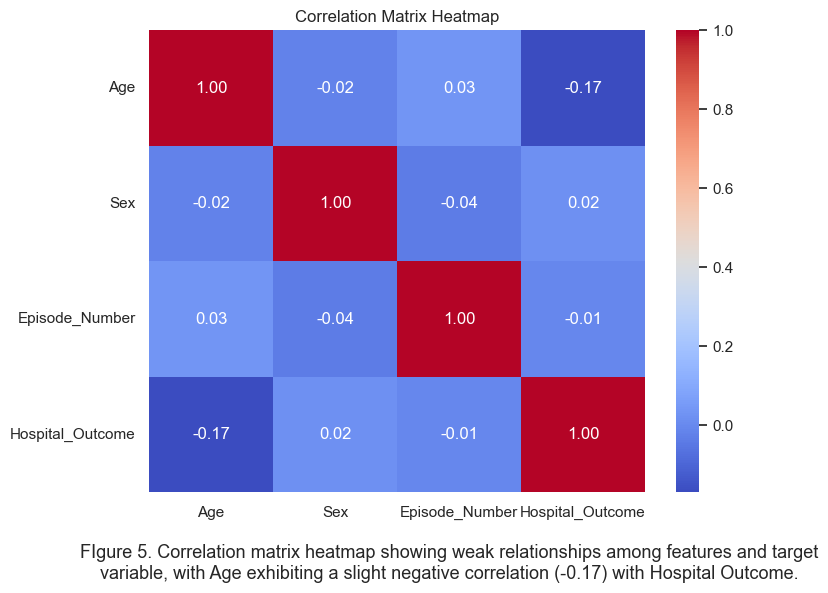

In [813]:
# Calculate the correlation matrix
corr_matrix = df.corr(method= 'pearson')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap')


caption = ("FIgure 5. Correlation matrix heatmap showing weak relationships among features and target variable, with Age exhibiting a slight negative correlation (-0.17) with Hospital Outcome.")
plt.figtext(0.5, -0.03, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "corr_matrix.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


**Data Split**

In [642]:
# import numpy as np 
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import train_test_split

# random_state = 17

# X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)


# kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)

# result = kf.split(X_other,y_other)

# for train_index, val_index in result:
#     print('new fold')
#     X_train = X_other.iloc[train_index]
#     y_train = y_other.iloc[train_index]
#     X_val = X_other.iloc[val_index]
#     y_val = y_other.iloc[val_index]

#     # # percentage of 0 and 1 in train and val
#     # print(np.unique(y_train))
#     # print(np.unique(y_val))
#     # print("Train:", train_index)
#     # # print("Test:", )
#     # print("Validation:", val_index)
 
#     # Calculate the percentage of 0 and 1 in y_train
#     train_counts = np.bincount(y_train)
#     train_percentages = train_counts / len(y_train) * 100
#     print(f'Train set: 0 - {train_percentages[0]:.2f}%, 1 - {train_percentages[1]:.2f}%')
#     print(train_counts[0])
#     print(train_counts[1])

#     # Calculate the percentage of 0 and 1 in y_val
#     val_counts = np.bincount(y_val)
#     val_percentages = val_counts / len(y_val) * 100
#     print(f'Validation set: 0 - {val_percentages[0]:.2f}%, 1 - {val_percentages[1]:.2f}%')
#     print(val_counts[0])
#     print(val_counts[1])

#     # Calculate the percentage of 0 and 1 in y_test
#     test_counts = np.bincount(y_test)
#     test_percentages = test_counts / len(y_test) * 100
#     print(f'Test set: 0 - {test_percentages[0]:.2f}%, 1 - {test_percentages[1]:.2f}%')
#     print(test_counts[0])
#     print(test_counts[1])


#     # Print the indices of train and validation sets
#     print("Train indices:", train_index)
#     print("Validation indices:", val_index)
#     print('-' * 40)

#     # Calculate the sizes
#     train_size = len(X_train)
#     val_size = len(X_val)
#     test_size = len(X_test)

#     # # Calculate the ratios
#     # total_size = len(X)
#     # train_ratio = train_size / total_size * 100
#     # val_ratio = val_size / total_size * 100
#     # test_ratio = test_size / total_size * 100

#     # # Print the sizes and ratios
#     # print(f'Train size: {train_size} ({train_ratio:.2f}%)')
#     # print(f'Validation size: {val_size} ({val_ratio:.2f}%)')
#     # print(f'Test size: {test_size} ({test_ratio:.2f}%)')
#     # print('-' * 40)

In [643]:
# print(X_train.describe())

In [644]:
# from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

# scaler = MinMaxScaler()
# X_train_age = scaler.fit_transform(X_train[['Age']])
# X_val_age = scaler.transform(X_val[['Age']])
# X_test_age = scaler.transform(X_test[['Age']])

# encoder = OrdinalEncoder()
# X_train_epNum = encoder.fit_transform(X_train[['Episode_Number']])
# X_val_epNum = encoder.transform(X_val[['Episode_Number']])
# X_test_epNum = encoder.transform(X_test[['Episode_Number']])


# # Convert the prep arrays back into DataFrames with the original column names
# X_train_prep = X_train.copy()
# X_train_prep['Age'] = X_train_age
# X_train_prep['Episode_Number'] = X_train_epNum

# X_val_prep = X_val.copy()
# X_val_prep['Age'] = X_val_age
# X_val_prep['Episode_Number'] = X_val_epNum

# X_test_prep = X_test.copy()
# X_test_prep['Age'] = X_test_age
# X_test_prep['Episode_Number'] = X_test_epNum

# # Now X_train_prep, X_val_prep, and X_test_prep have the updated columns

# # print("Original X_train shape:", X_train.shape)
# # print("Transformed X_train_prep shape:", X_train_prep.shape)
# # print("\n")
# print(" 'X_train' Before preprocessing:")
# print("\n", X_train.describe())
# print("\n")
# print("'X_train' After preprocessing:")
# print("\n", X_train_prep.describe())

In [645]:
# print(X_train.shape())
# print("\n")
# print(X_train_prep.shape())

In [646]:
# import pandas as pd
# import numpy as np

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder


# ordinal_ftrs = ['Episode_Number'] 
# minmax_ftrs = ['Age']
# passthrough_ftrs = ['Sex']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ord', OrdinalEncoder(), ordinal_ftrs),
#         ('minmax', MinMaxScaler(), minmax_ftrs)],
#     remainder='passthrough'  # Pass through the remaining columns untransformed
# )

# clf = Pipeline(steps=[('preprocessor', preprocessor)])
                                    

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)


# # Print shapes to verify
# print("Original X_train shape:", X_train.shape)
# print("Transformed X_train_prep shape:", X_train_prep.shape)

# # Retrieve feature names
# feature_names = clf.named_steps['preprocessor'].get_feature_names_out()
# print("Transformed feature names:", feature_names)

# # Convert transformed data back to DataFrame (optional)
# X_train_prep_df = pd.DataFrame(X_train_prep, columns=feature_names)
# X_val_prep_df = pd.DataFrame(X_val_prep, columns=feature_names)
# X_test_prep_df = pd.DataFrame(X_test_prep, columns=feature_names)

# print(X_train.describe())
# print("\n")
# print(X_train_prep_df.describe())

In [647]:
# Get the total count
total_count = y.value_counts().sum()

# Calculate the percentage for each class
percentage = y.value_counts() / total_count * 100

# Display the result
print(percentage)

Hospital_Outcome
1    92.632838
0     7.367162
Name: count, dtype: float64


In [648]:
# from sklearn.metrics import make_scorer, precision_recall_curve, auc
# from sklearn.model_selection import train_test_split, KFold, GridSearchCV
# from sklearn.utils.class_weight import compute_sample_weight
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# import numpy as np
# import joblib
# import os


# def MLpipe_KFold_AUC_PR(X, y, preprocessor, ML_algo, param_grid, model_name):
#     """
#     Function to perform KFold cross-validation, hyperparameter tuning with GridSearchCV, and evaluate with AUC-PR.
#     Args:
#         X (pd.DataFrame): Feature matrix.
#         y (pd.Series): Target variable.
#         preprocessor (ColumnTransformer): Preprocessor pipeline for data transformation.
#         ML_algo (Estimator): Uninitialized machine learning algorithm (e.g., RandomForestClassifier()).
#         param_grid (dict): Parameter grid for hyperparameter tuning.
#         model_name (str): Name of the algorithm for saving models.
#     Returns:
#         mean_test_score (float): The mean AUC-PR score across random states for the algorithm.
#         best_test_score (float): The highest test AUC-PR score within the algorithm.
#         best_model (Estimator): The best-performing model within the algorithm.
#         X_test (pd.DataFrame): Test features corresponding to the best model.
#         y_test (pd.Series): Test targets corresponding to the best model.
#     """

#     # Initialize variables to track the best model for the current algorithm
#     best_test_score = -np.inf
#     best_model = None
#     X_test, y_test = None, None
#     test_scores = []

#     # Define the scoring function for GridSearchCV
#     def auc_pr_scorer(estimator, X_val, y_val):
#         y_val_prob = estimator.predict_proba(X_val)[:, 1]
#         precision, recall, _ = precision_recall_curve(y_val, y_val_prob)
#         return auc(recall, precision)

#     random_states = [42 * i for i in range(5)]  # Generate random states

#     for i, random_state in enumerate(random_states):
#         print(f"\n========== Random State: {random_state} ==========")

#         # Split the data
#         X_other, X_test, y_other, y_test = train_test_split(
#             X, y, test_size=0.2, stratify=y, random_state=random_state
#         )

#         # Apply KFold with 4 splits
#         kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

#         # for train_index, val_index in kf.split(X_other, y_other):
#         #     print('new fold')
#         #     X_train = X_other.iloc[train_index]
#         #     y_train = y_other.iloc[train_index]

#         # Create pipeline
#         # pipeline = Pipeline(steps=[
#         #     ('preprocessor', preprocessor),
#         #     ('scaler', StandardScaler()),
#         #     ('model', ML_algo)
#         # ])

#         pipeline = Pipeline(steps=[
#             ('preprocessor', preprocessor),
#             ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # Add polynomial features
#             ('scaler', StandardScaler()),
#             ('model', ML_algo)
#         ])
    
#         # GridSearchCV for hyperparameter tuning
#         grid_search = GridSearchCV(
#             estimator=pipeline,
#             param_grid=param_grid,
#             cv=kf,
#             scoring=auc_pr_scorer,
#             n_jobs=-1
#         )

#         # sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

#         print("Performing GridSearchCV...")
#         grid_search.fit(X_other, y_other)

#         # Print the best parameters found
#         print(f"Best parameters found for Random State {random_state}: {grid_search.best_params_}")

#         # Extract the best model for this random state
#         best_model_for_state = grid_search.best_estimator_

#         # Save the model for this random state
#         state_model_filename = f"{model_name}_{i + 1}.pkl"
#         joblib.dump(best_model_for_state, state_model_filename)
#         print(f"Saved model for {model_name}, Random State {i + 1} as {state_model_filename}")

#         # Predict on the test set
#         y_test_prob = best_model_for_state.predict_proba(X_test)[:, 0]
#         precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
#         test_auc_pr = auc(recall, precision)
#         test_scores.append(test_auc_pr)

#         print(f"Test AUC-PR score for Random State {random_state}: {test_auc_pr:.4f}")

#         # Update the best model for the current algorithm
#         if test_auc_pr > best_test_score:
#             best_test_score = test_auc_pr
#             best_model = best_model_for_state
#             # best_X_train = X_train

#     # Calculate the mean and standard deviation of test scores
#     mean_test_score = np.mean(test_scores)
#     std_auc_pr = np.std(test_scores)

#     print("\n========== Summary for Algorithm ==========")
#     # print(f"Mean Test AUC-PR Score: {mean_test_score:.4f}")   
#     print(f"\nMean Test AUC-PR Score for {model_name}: {mean_test_score:.4f}")
#     print(f"Standard Deviation of Test AUC-PR Score for {model_name}: {std_auc_pr:.4f}")
#     print(f"The Best AUC-PR Score for {model_name}: {best_test_score:.4f}")

#     return mean_test_score, best_test_score, test_scores, best_model, X_test, y_test


In [649]:
from sklearn.metrics import make_scorer, precision_recall_curve, auc
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import joblib
import os


def MLpipe_KFold_AUC_PR(X, y, preprocessor, ML_algo, param_grid, model_name):
    """
    Function to perform KFold cross-validation, hyperparameter tuning with GridSearchCV, and evaluate with AUC-PR.
    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        preprocessor (ColumnTransformer): Preprocessor pipeline for data transformation.
        ML_algo (Estimator): Uninitialized machine learning algorithm (e.g., RandomForestClassifier()).
        param_grid (dict): Parameter grid for hyperparameter tuning.
        model_name (str): Name of the algorithm for saving models.
    Returns:
        mean_test_score (float): The mean AUC-PR score across random states for the algorithm.
        best_test_score (float): The highest test AUC-PR score within the algorithm.
        best_model (Estimator): The best-performing model within the algorithm.
        X_test (pd.DataFrame): Test features corresponding to the best model.
        y_test (pd.Series): Test targets corresponding to the best model.
    """

    # Initialize variables to track the best model for the current algorithm
    best_test_score = -np.inf
    best_model = None
    X_test, y_test = None, None
    test_scores = []

    # Define the scoring function for GridSearchCV
    def auc_pr_scorer(estimator, X_val, y_val):
        y_val_prob = estimator.predict_proba(X_val)[:, 0]
        precision, recall, _ = precision_recall_curve(y_val, y_val_prob, pos_label=0)
        return auc(recall, precision)

    random_states = [42 * i for i in range(5)]  # Generate random states

    for i, random_state in enumerate(random_states):
        print(f"\n========== Random State: {random_state} ==========")

        # Split the data
        X_other, X_test, y_other, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=random_state
        )

        # Apply KFold with 4 splits
        kf = KFold(n_splits=4, shuffle=True, random_state=random_state)

        # for train_index, val_index in kf.split(X_other, y_other):
        #     X_train = X_other.iloc[train_index]
        #     y_train = y_other.iloc[train_index]

        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # Add polynomial features
            ('scaler', StandardScaler()),
            ('model', ML_algo)
        ])
    
        # GridSearchCV for hyperparameter tuning
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=param_grid,
            cv=kf,
            scoring=auc_pr_scorer,
            n_jobs=-1
        )

        print("Performing GridSearchCV...")
        grid_search.fit(X_other, y_other)

        # Print the best parameters found
        print(f"Best parameters found for Random State {random_state}: {grid_search.best_params_}")

        # Extract the best model for this random state
        best_model_for_state = grid_search.best_estimator_

        # Save the model for this random state
        state_model_filename = f"{model_name}_{i + 1}.pkl"
        joblib.dump(best_model_for_state, state_model_filename)
        print(f"Saved model for {model_name}, Random State {i + 1} as {state_model_filename}")

        # Predict on the test set
        y_test_prob = best_model_for_state.predict_proba(X_test)[:, 0]
        precision, recall, _ = precision_recall_curve(y_test, y_test_prob, pos_label=0)
        test_auc_pr = auc(recall, precision)
        test_scores.append(test_auc_pr)

        print(f"Test AUC-PR score for Random State {random_state}: {test_auc_pr:.4f}")

        # Update the best model for the current algorithm
        if test_auc_pr > best_test_score:
            best_test_score = test_auc_pr
            best_model = best_model_for_state
            # best_y_train = y_train

    # Calculate the mean and standard deviation of test scores
    mean_test_score = np.mean(test_scores)
    std_auc_pr = np.std(test_scores)

    print("\n========== Summary for Algorithm ==========")
    print(f"\nMean Test AUC-PR Score for {model_name}: {mean_test_score:.4f}")
    print(f"Standard Deviation of Test AUC-PR Score for {model_name}: {std_auc_pr:.4f}")
    print(f"The Best AUC-PR Score for {model_name}: {best_test_score:.4f}")

    return mean_test_score, best_test_score, test_scores, best_model, X_test, y_test


In [650]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from xgboost import XGBClassifier

# Define the preprocessor
ordinal_ftrs = ['Episode_Number']
minmax_ftrs = ['Age']
passthrough_ftrs = ['Sex']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs)],
        remainder='passthrough'  # Pass through the remaining columns untransformed
)

# Define models and parameter grids
models = {
    'LogisticRegression': (
        LogisticRegression(solver='saga', class_weight='balanced'),  
        {'model__penalty': ['elasticnet'],
         'model__C': [1e-3, 1e-2, 1e-1, 1e0],
         'model__l1_ratio': [0, 0.25, 0.5, 0.75, 1]}),
         
    'RandomForestClassifier':(
        RandomForestClassifier(class_weight = 'balanced'),                         
        {'model__max_depth': [1, 2, 3, 4],
        'model__max_features': [0.75, 0.8, 0.85, 0.9, 1]}),

    'KNeighborsClassifier':(
    KNeighborsClassifier(),
    {'model__n_neighbors': [1300, 1500, 1700],
    'model__metric': ['euclidean', 'manhattan'],
    'model__weights': ['uniform']}),

    'XGBClassifier': (
        XGBClassifier(eval_metric='aucpr', scale_pos_weight=sum(y == 1)/sum(y == 0)), # #1/#0
        {'model__reg_alpha': [1e1, 1e2, 1e3, 1e4],
        'model__reg_lambda': [ 1e-2, 1e-1, 1e0, 1e1],
        'model__max_depth': [1,3,5]}),

    'SVC': (
    SVC(probability=True, class_weight='balanced'),
    {'model__gamma': [1e-1, 1e0, 1e1],
    'model__C': [1e-1, 1e0, 1e1]})
}

# MLpipe_KFold_AUC_PR

# Initialize a dictionary to store results
# results = {}

# # Loop through each model, run the pipeline, and collect results
# for model_name, (model, param_grid) in models.items():
#     print(f"\n--- Running model: {model_name} ---")
#     test_scores, best_models = MLpipe_KFold_AUC_PR(X, y, preprocessor, model, param_grid)
#     mean_auc_pr = np.mean(test_scores)
#     std_auc_pr = np.std(test_scores)
#     results[model_name] = (mean_auc_pr, std_auc_pr)  # Store results in dictionary
#     print(f"\nMean Test AUC-PR Score for {model_name}: {mean_auc_pr:.4f}")
#     print(f"Standard Deviation of Test AUC-PR Score for {model_name}: {std_auc_pr:.4f}")

In [651]:
# Initialize variables
results = {}
results2 = {}
algorithm_best_model = None
algorithm_highest_mean_score = -np.inf

# Correct loop unpacking for the pipeline function
for model_name, (model, param_grid) in models.items():
    print(f"\n--- Running model: {model_name} ---")
    mean_test_score, best_test_score, test_scores, best_model, X_test, y_test = MLpipe_KFold_AUC_PR(
        X, y, preprocessor, model, param_grid, model_name
    )

    # Calculate standard deviation
    std_auc_pr = np.std(test_scores)

    # Store results
    results[model_name] = (mean_test_score, best_test_score, best_model)
    results2[model_name] = (mean_test_score, std_auc_pr)

    # Update the best overall model
    if mean_test_score > algorithm_highest_mean_score:
        algorithm_highest_mean_score = mean_test_score
        algorithm_best_model = best_model
        best_random_state = 42 * np.argmax(test_scores)

    # Print results for the current algorithm
    # print(f"\nMean Test AUC-PR Score for {model_name}: {mean_test_score:.4f}")
    # print(f"Standard Deviation of Test AUC-PR Score for {model_name}: {std_auc_pr:.4f}")

# Save the best overall model
model_filename = "best_model_overall.pkl"
joblib.dump(algorithm_best_model, model_filename)
print(f"\nSaved best overall model as {model_filename}")


--- Running model: LogisticRegression ---

========== Random State: 0 ==========
Performing GridSearchCV...


Best parameters found for Random State 0: {'model__C': 0.01, 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet'}
Saved model for LogisticRegression, Random State 1 as LogisticRegression_1.pkl
Test AUC-PR score for Random State 0: 0.1425

========== Random State: 42 ==========
Performing GridSearchCV...
Best parameters found for Random State 42: {'model__C': 0.1, 'model__l1_ratio': 0.25, 'model__penalty': 'elasticnet'}
Saved model for LogisticRegression, Random State 2 as LogisticRegression_2.pkl
Test AUC-PR score for Random State 42: 0.1483

========== Random State: 84 ==========
Performing GridSearchCV...
Best parameters found for Random State 84: {'model__C': 0.01, 'model__l1_ratio': 0.5, 'model__penalty': 'elasticnet'}
Saved model for LogisticRegression, Random State 3 as LogisticRegression_3.pkl
Test AUC-PR score for Random State 84: 0.1310

========== Random State: 126 ==========
Performing GridSearchCV...
Best parameters found for Random State 126: {'model__C': 0.1, 'model__l

In [652]:
# # Print sorted results
# sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
# print("\n========== Final Results Sorted by Mean Test AUC-PR Score ==========")
# for model_name, (mean_auc_pr, std_auc_pr) in sorted_results:
#     print(f"{model_name}: Mean AUC-PR = {mean_auc_pr:.4f}, Std Dev = {std_auc_pr:.4f}")

# # Print the best overall model with random state
# print("\n========== Best Overall Model ==========")
# print(f"Model: {best_overall_model}")
# print(f"Highest Test AUC-PR Score: {highest_mean_score:.4f}")
# print(f"Corresponding Random State: {best_random_state}")

In [653]:
# Sorted results with mean and std
sorted_results2 = sorted(results2.items(), key=lambda x: x[1][0], reverse=True)
print("\n========== Final Results Sorted by Mean Test AUC-PR Score with Std Dev==========")
for model_name, (mean_auc_pr, std_auc_pr) in sorted_results2:
    print(f"{model_name}: Mean AUC-PR = {mean_auc_pr:.4f}, Std Dev = {std_auc_pr:.4f}")

# Sorted results with mean and best AUC-PR
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
print("\n========== Final Results Sorted by Mean Test AUC-PR Score with Best AUC-PR ==========")
for model_name, (mean_auc_pr, best_auc_pr, _) in sorted_results:
    print(f"{model_name}: Mean AUC-PR = {mean_auc_pr:.4f}, Best AUC-PR = {best_auc_pr:.4f}")

# Print the best overall model
print("\n========== Best Overall Model ==========")
print(f"Model: {algorithm_best_model}")
print(f"Mean AUC-PR Score: {algorithm_highest_mean_score:.4f}")
print(f"Corresponding Random State: {best_random_state}")


========== Final Results Sorted by Mean Test AUC-PR Score with Std Dev==========
RandomForestClassifier: Mean AUC-PR = 0.2159, Std Dev = 0.0046
KNeighborsClassifier: Mean AUC-PR = 0.1419, Std Dev = 0.0064
LogisticRegression: Mean AUC-PR = 0.1402, Std Dev = 0.0061
XGBClassifier: Mean AUC-PR = 0.1384, Std Dev = 0.0072
SVC: Mean AUC-PR = 0.1365, Std Dev = 0.0050

========== Final Results Sorted by Mean Test AUC-PR Score with Best AUC-PR ==========
RandomForestClassifier: Mean AUC-PR = 0.2159, Best AUC-PR = 0.2215
KNeighborsClassifier: Mean AUC-PR = 0.1419, Best AUC-PR = 0.1503
LogisticRegression: Mean AUC-PR = 0.1402, Best AUC-PR = 0.1483
XGBClassifier: Mean AUC-PR = 0.1384, Best AUC-PR = 0.1508
SVC: Mean AUC-PR = 0.1365, Best AUC-PR = 0.1437

========== Best Overall Model ==========
Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord', OrdinalEncoder(),
                                

In [654]:
# # Calculate the baseline AUC-PR
# positive_class_ratio = np.sum(y) / len(y)  # Proportion of positive class
# print(f"Baseline AUC-PR Score: {positive_class_ratio:.4f}")

In [655]:
baseline_prob = np.zeros_like(y_test)  # Always predict class 0
precision, recall, _ = precision_recall_curve(y_test, baseline_prob, pos_label=0)
baseline_AUC_PR = auc(recall, precision)
print(f"Baseline AUC-PR for class 0: {baseline_AUC_PR:.4f}")


Baseline AUC-PR for class 0: 0.5368


In [656]:
y_test.shape

(22069,)

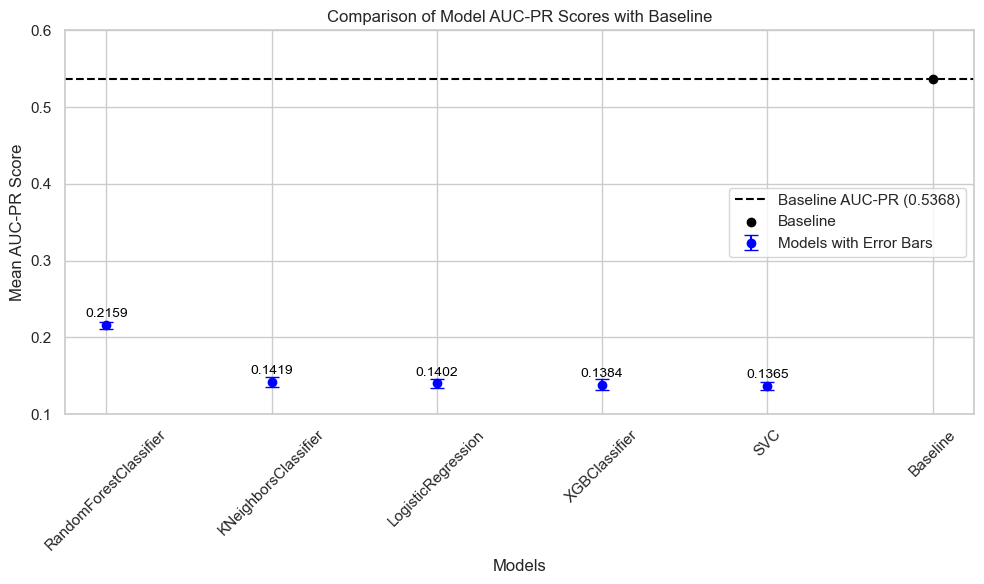

In [ ]:
import matplotlib.pyplot as plt
import numpy as np





# Data from sorted results
models = [model_name for model_name, _ in sorted_results2]  # Extract model names
mean_scores = [mean_auc_pr for _, (mean_auc_pr, _) in sorted_results2]  # Extract mean AUC-PR scores
std_devs = [std_auc_pr for _, (_, std_auc_pr) in sorted_results2]  # Extract standard deviations


models.append('Baseline')
mean_scores.append(baseline_AUC_PR)
std_devs.append(0)  # Baseline has no standard deviation

# Colors for bars
colors = ['blue', 'orange', 'green', 'red'] + ['gray']

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=models[:-1],  # Exclude baseline for error bars
    y=mean_scores[:-1],
    yerr=std_devs[:-1],
    fmt='o',  # Circle markers
    capsize=5,
    color='blue',
    label='Models with Error Bars'
)
plt.axhline(baseline_AUC_PR, color='black', linestyle='--', label=f'Baseline AUC-PR ({baseline_AUC_PR:.4f})')

# Add individual points for the baseline
plt.scatter(['Baseline'], [baseline_AUC_PR], color='black', label='Baseline', zorder=5)

# Add annotations for the mean AUC-PR scores
for i, (model_name, mean_score) in enumerate(zip(models[:-1], mean_scores[:-1])):  # Exclude baseline
    plt.text(i, mean_score + 0.01, f'{mean_score:.4f}', ha='center', fontsize=10, color='black')

# Label enhancements
plt.xlabel('Models')
plt.ylabel('Mean AUC-PR Score')
plt.title('Comparison of Model AUC-PR Scores with Baseline')
plt.xticks(rotation=45)
plt.ylim(0.1, 0.6)  # Adjust based on your AUC-PR range
plt.legend()
plt.tight_layout()
plt.show()


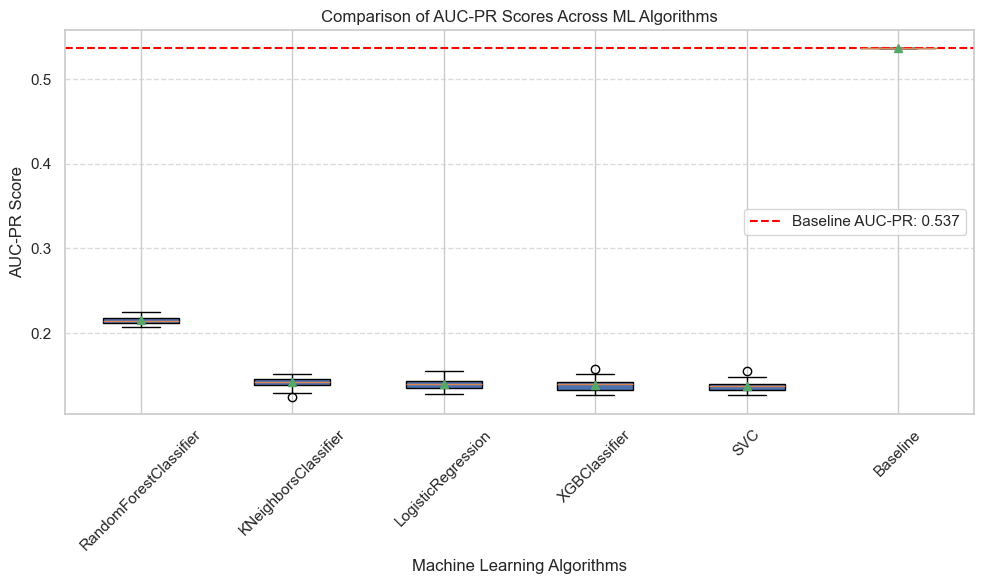

In [739]:
import matplotlib.pyplot as plt
import numpy as np

# Define baseline score
# baseline_score = np.sum(y) / len(y)  # Replace with the actual baseline AUC-PR score

# # Add the baseline AUC-PR
# baseline = np.sum(y_test) / len(y_test)
# baseline_y_pred = np.full((22069,), baseline)
# precision, recall, _ = precision_recall_curve(y_test, baseline_y_pred)
# test_auc_pr = auc(recall, precision)

# baseline_AUC_PR =  test_auc_pr # Fraction of positive samples as baseline

# Generate synthetic scores for box plot using mean and std deviations
np.random.seed(42)  # For reproducibility
box_data = [np.random.normal(loc=mean, scale=std, size=50) for mean, std in zip(mean_scores, std_devs)]
# Create the box plot
plt.figure(figsize=(10, 6))
box =  plt.boxplot(box_data, tick_labels=models, patch_artist=True, showmeans=True)

# Add baseline as a horizontal line
plt.axhline(y=baseline_AUC_PR, color='red', linestyle='--', label=f'Baseline AUC-PR: {baseline_AUC_PR:.3f}')
    
# Plot customization
plt.title('Comparison of AUC-PR Scores Across ML Algorithms')
plt.ylabel('AUC-PR Score')
plt.xlabel('Machine Learning Algorithms')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


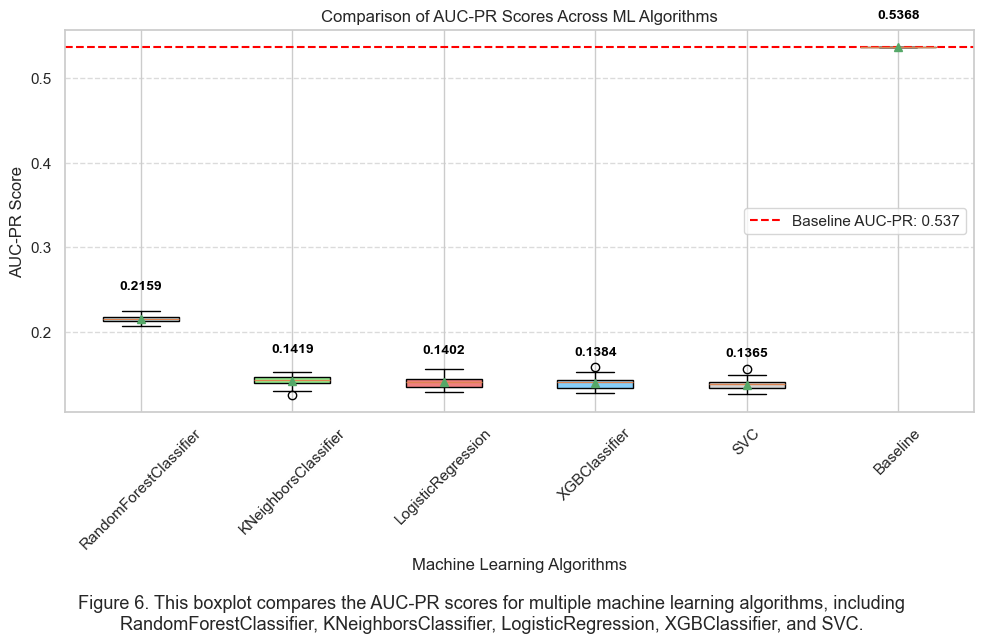

In [816]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic scores for box plot using mean and std deviations
np.random.seed(42)  # For reproducibility
box_data = [np.random.normal(loc=mean, scale=std, size=50) for mean, std in zip(mean_scores, std_devs)]

# Create the box plot
plt.figure(figsize=(10, 6))
box = plt.boxplot(box_data, patch_artist=True, showmeans=True)

# Add baseline as a horizontal line
plt.axhline(y=baseline_AUC_PR, color='red', linestyle='--', label=f'Baseline AUC-PR: {baseline_AUC_PR:.3f}')

# Annotate mean scores above each box
for i, mean in enumerate(mean_scores):
    plt.text(i + 1, mean + 0.03, f'{mean:.4f}', 
             ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Customize box colors for better visibility
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgray']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot customization
plt.title('Comparison of AUC-PR Scores Across ML Algorithms')
plt.ylabel('AUC-PR Score')
plt.xlabel('Machine Learning Algorithms')
plt.xticks(ticks=np.arange(1, len(models) + 1), labels=models, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Add a caption using figtext
caption = ("Figure 6. This boxplot compares the AUC-PR scores for multiple machine learning algorithms, including RandomForestClassifier, KNeighborsClassifier, LogisticRegression, XGBClassifier, and SVC.")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "model_compare.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')


plt.tight_layout()

# Show the plot
plt.show()


In [719]:
best_model_filename = "/Users/yzc/Desktop/Fall-2024/DATA-1030/Project/best_model_overall.pkl"  # Replace with the actual file name of the saved RandomForestClassifier model
best_model = joblib.load(best_model_filename)
print(f"Loaded best model: {best_model}")

Loaded best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord', OrdinalEncoder(),
                                                  ['Episode_Number']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Age'])])),
                ('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=1,
                                        max_features=0.9))])


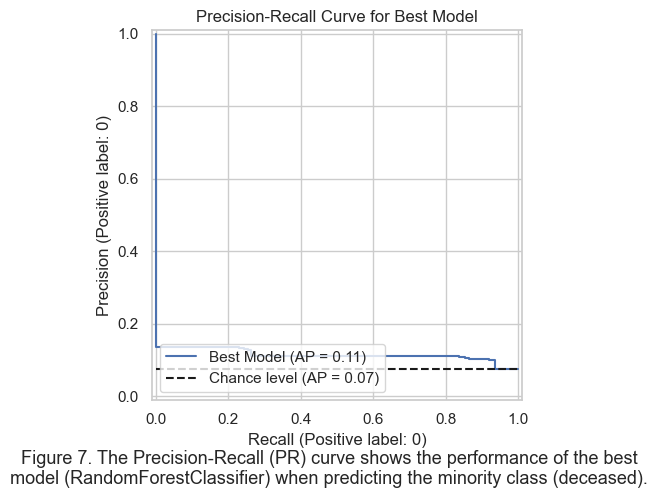

In [817]:
import joblib
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Load the best model
best_model = joblib.load('/Users/yzc/Desktop/Fall-2024/DATA-1030/Project/best_model_overall.pkl')


display = PrecisionRecallDisplay.from_estimator(
    best_model, X_test, y_test, name="Best Model", plot_chance_level=True, pos_label = 0
)
_ = display.ax_.set_title("Precision-Recall Curve for Best Model")


# Add a caption using figtext
caption = ("Figure 7. The Precision-Recall (PR) curve shows the performance of the best model (RandomForestClassifier) when predicting the minority class (deceased).")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "PR curve.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')




plt.show()


# Ensure the test data (X_test and y_test) is available
# These should have been returned by your ML pipeline or stored beforehand
# For demonstration, use placeholders: replace with actual X_test, y_test
# X_test, y_test = <actual_test_features>, <actual_test_labels>

# # Predict probabilities or decision function
# try:
#     # Use `decision_function` if the model supports it
#     y_score = best_model.decision_function(best_X_test)
# except AttributeError:
#     # Fall back to `predict_proba` if `decision_function` is not available
#     y_score = best_model.predict_proba(best_X_test)[:, 1]

# # Plot the Precision-Recall curve
# display = PrecisionRecallDisplay.from_predictions(
#     best_y_test, y_score, name="Best Model", plot_chance_level=True
# )
# _ = display.ax_.set_title("Precision-Recall Curve for Best Model")
# plt.show()

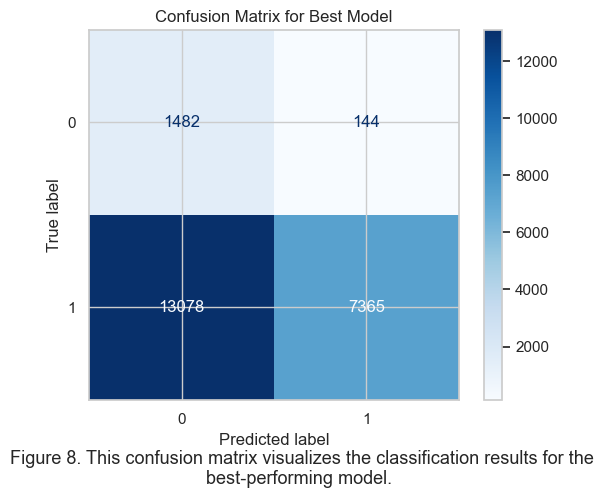

In [818]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test data
y_test_pred = best_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Best Model")




# Add a caption using figtext
caption = ("Figure 8. This confusion matrix visualizes the classification results for the best-performing model. ")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "matrix.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')
plt.show()


In [662]:
np.sum(y) / len(y)

0.9263283820157512

In [663]:
np.sum(y_test) / len(y_test)

0.9263219901218904

In [664]:
y_test.value_counts()

Hospital_Outcome
1    20443
0     1626
Name: count, dtype: int64

**Permutation Importance**

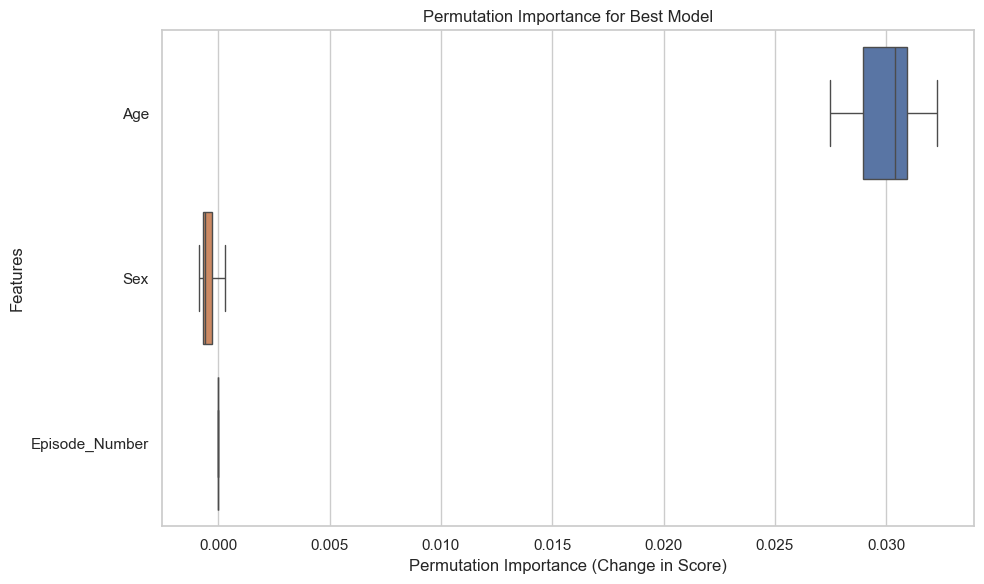

In [678]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute permutation importance on the test set
# Replace 'auc_pr_scorer' below with the appropriate scoring if you defined a custom scorer.
# If you used a custom scorer like auc_pr_scorer (defined as a function), 
# you may need to pass scoring='accuracy' or another built-in metric here 
# unless you can pass a callable. For demonstration, let's assume scoring='average_precision'.
result = permutation_importance(
    estimator=best_model, 
    X=X_test, 
    y=y_test, 
    scoring='average_precision',  
    n_repeats=10, 
    random_state=42, 
    n_jobs=-1
)

# Get feature names from the pipeline
# If you used ColumnTransformer, you'll need to verify the order of features after transformations.
# If X_test is a DataFrame with final feature names, you can use:
feature_names = X_test.columns

# Create a DataFrame for convenience
imp_df = pd.DataFrame(
    result.importances.T, 
    columns=feature_names
)

# Plot a boxplot of permutation importances
plt.figure(figsize=(10, 6))
sns.boxplot(data=imp_df, orient='h')
plt.xlabel("Permutation Importance (Change in Score)")
plt.ylabel("Features")
plt.title("Permutation Importance for Best Model")
plt.tight_layout()
plt.show()


In [ ]:
# from sklearn.inspection import permutation_importance
# import matplotlib.pyplot as plt
# import numpy as np
# import joblib

# # Load the best model
# best_model = joblib.load("best_model_overall.pkl")

# # Calculate permutation importance
# perm_importance = permutation_importance(best_model, X_test, y_test, scoring='average_precision')

# # Sort and plot
# sorted_idx = perm_importance.importances_mean.argsort()
# plt.figure(figsize=(8, 6))
# plt.barh(np.array(X_test.columns)[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.title("Feature Importance: Permutation")
# plt.tight_layout()
# plt.show()


In [ ]:
# from sklearn.inspection import permutation_importance
# # Extract feature importance from the model
# feature_importances = best_model.named_steps['model'].feature_importances_  # Assuming tree-based model

# # Sort and plot
# sorted_idx = np.argsort(feature_importances)
# plt.figure(figsize=(8, 6))
# plt.barh(np.array(X_test.columns)[sorted_idx], feature_importances[sorted_idx])
# plt.xlabel("Gini Importance")
# plt.title("Feature Importance: Gini (Tree-Based Models)")
# plt.tight_layout()
# plt.show()


**After PolynomialFeatures**

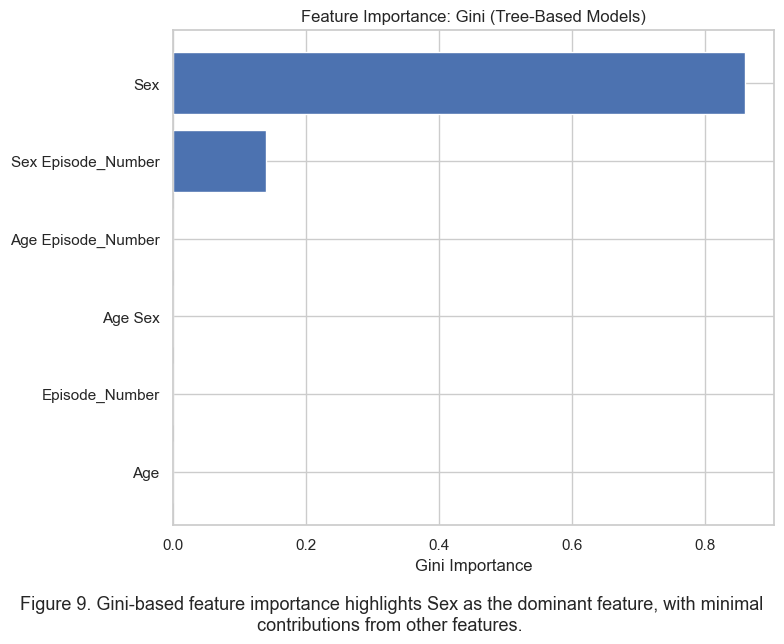

In [821]:
from sklearn.pipeline import Pipeline

# Load the best model
best_model = joblib.load("best_model_overall.pkl")


# Ensure your pipeline includes the PolynomialFeatures step
poly = best_model.named_steps['poly']  # Extract the PolynomialFeatures step
# scaler = best_model.named_steps['scaler']  # Extract the StandardScaler step

# Get updated feature names after PolynomialFeatures
original_feature_names = X_test.columns
poly_feature_names = poly.get_feature_names_out(original_feature_names)
# preprocessor = best_model.named_steps['preprocessor']
# preprocessor_feature_names = preprocessor.get_feature_names_out()
# poly_feature_names = poly.get_feature_names_out(preprocessor_feature_names)


# Extract Gini importances
feature_importances = best_model.named_steps['model'].feature_importances_  # Assuming tree-based model

assert len(feature_importances) == len(poly_feature_names), "Mismatch in the number of features."


# Sort and plot
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(8, 6))
plt.barh(np.array(poly_feature_names)[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Gini Importance")
plt.title("Feature Importance: Gini (Tree-Based Models)")
plt.tight_layout()

# Add a caption using figtext
caption = ("Figure 9. Gini-based feature importance highlights Sex as the dominant feature, with minimal contributions from other features. ")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "gini.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')


plt.show()


In [685]:
original_feature_names = X_test.columns
poly_feature_names = poly.get_feature_names_out(original_feature_names)
poly_feature_names

array(['Age', 'Sex', 'Episode_Number', 'Age Sex', 'Age Episode_Number',
       'Sex Episode_Number'], dtype=object)

['Age' 'Sex' 'Episode_Number' 'Age Sex' 'Age Episode_Number'
 'Sex Episode_Number']


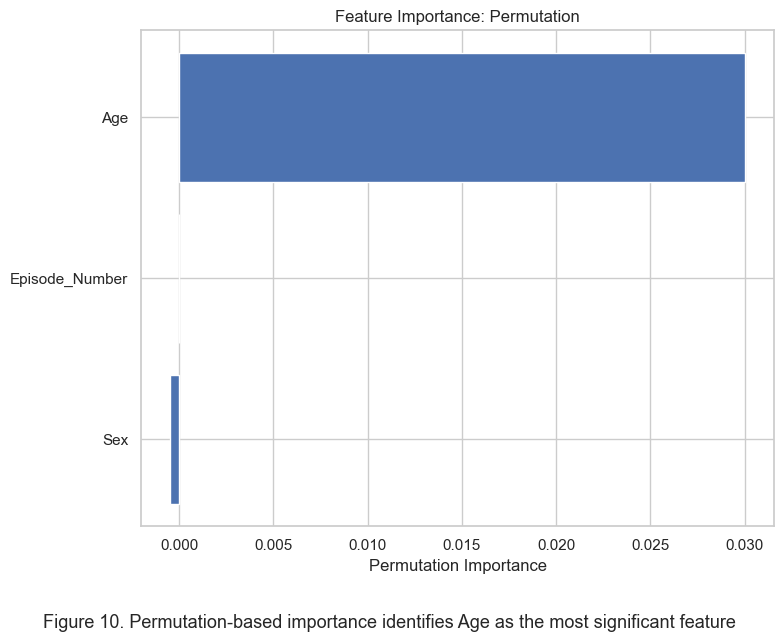

In [822]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Load the best model
best_model = joblib.load("best_model_overall.pkl")

# Extract the PolynomialFeatures transformer from the pipeline
poly = best_model.named_steps['poly']  # Ensure this matches your pipeline step name

# Get the updated feature names after PolynomialFeatures
original_feature_names = X_test.columns
poly_feature_names = poly.get_feature_names_out(original_feature_names)
print(poly_feature_names)
# preprocessor = best_model.named_steps['preprocessor']
# preprocessor_feature_names = preprocessor.get_feature_names_out()
# poly_feature_names = poly.get_feature_names_out(preprocessor_feature_names)

# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring='average_precision', n_repeats=10, random_state=42)

# Sort and plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 6))
plt.barh(np.array(poly_feature_names)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance: Permutation")
plt.tight_layout()


# Add a caption using figtext
caption = ("Figure 10. Permutation-based importance identifies Age as the most significant feature ")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "permutation.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
import joblib
import shap
import matplotlib.pyplot as plt

# Load the saved best model
best_model = joblib.load("best_model_overall.pkl")

# Extract pipeline steps
preprocessor = best_model.named_steps['preprocessor']
poly = best_model.named_steps['poly']
model = best_model.named_steps['model']  # e.g., RandomForestClassifier

# Transform the test set as the model sees it
X_preprocessed = preprocessor.transform(X_test)
X_poly = poly.transform(X_preprocessed)

# Get the feature names after preprocessing and polynomial expansion
preprocessor_feature_names = preprocessor.get_feature_names_out()
poly_feature_names = poly.get_feature_names_out(preprocessor_feature_names)


# Initialize the SHAP explainer for a tree-based model
# Note: For tree-based models, we can directly use the final estimator
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the transformed test set
# shap_values will typically be of shape (n_samples, n_features) for regression or 
# (n_samples, n_classes, n_features) for classification.
shap_values = explainer.shap_values(X_poly)

# If this is a binary classification, shap_values is a list of two arrays: shap_values[0] for class 0 and shap_values[1] for class 1.
# Determine which class you want to explain. For example, if class 0 is the minority class of interest:
class_index = 0  # or 1, depending on your scenario

# Create a summary plot

shap.summary_plot(shap_values[:,:,class_index], X_poly, feature_names=poly_feature_names) #predicting class 0


# Add a caption using figtext
caption = ("Figure 11. SHAP summary plot highlights Age as the most impactful feature, with interactions involving Sex and Episode_Number showing moderate contributions.")
plt.figtext(0.5, -0.06, caption, wrap=True, horizontalalignment='center', fontsize=13)

plt.tight_layout()

import os
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "shap summary.png")

# Save the plot
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')



plt.show()


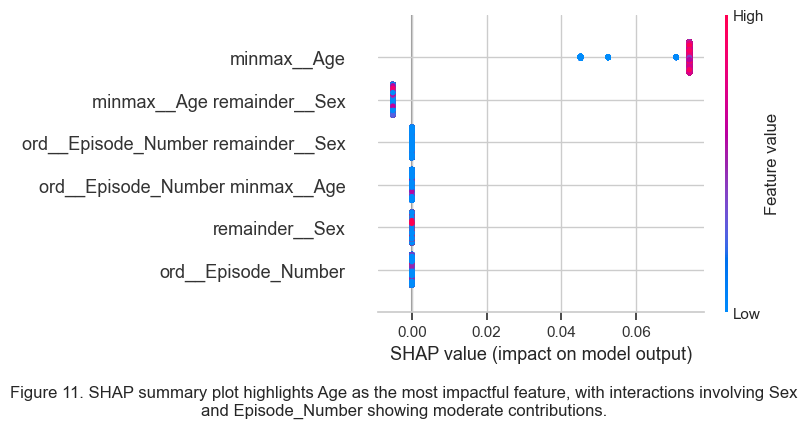

In [ ]:
import os
import matplotlib.pyplot as plt
import shap
import joblib

# Load the saved best model
best_model = joblib.load("best_model_overall.pkl")

# Extract pipeline steps
preprocessor = best_model.named_steps['preprocessor']
poly = best_model.named_steps['poly']
model = best_model.named_steps['model']  # e.g., RandomForestClassifier

# Transform the test set as the model sees it
X_preprocessed = preprocessor.transform(X_test)
X_poly = poly.transform(X_preprocessed)

# Get the feature names after preprocessing and polynomial expansion
preprocessor_feature_names = preprocessor.get_feature_names_out()
poly_feature_names = poly.get_feature_names_out(preprocessor_feature_names)

# Initialize the SHAP explainer for a tree-based model
explainer = shap.TreeExplainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(X_poly)

# For binary classification, choose the class to explain (class 0)
class_index = 0  # Change this as necessary for the minority class

# Create a SHAP summary plot
shap.summary_plot(
    shap_values[:,:,class_index], X_poly, feature_names=poly_feature_names, show=False, plot_type="dot"
)

# Add a caption below the plot
caption = ("Figure 11. SHAP summary plot highlights Age as the most impactful feature, "
           "with interactions involving Sex and Episode_Number showing moderate contributions.")
plt.figtext(0.5, -0.08, caption, wrap=True, horizontalalignment='center', fontsize=12)

# Save the combined plot with the caption
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot", "shap_summary.png")
plt.savefig(fname=desktop_path, format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [707]:
shap_values.shape

(22069, 6, 2)

In [ ]:
import shap
import matplotlib.pyplot as plt

# Ensure SHAP works with the model
explainer = shap.TreeExplainer(best_model.named_steps['model'], X_test)  # Adjust to your pipeline
shap_values = explainer(X_test)

# Increase figure size to ensure proper display of all features
plt.figure(figsize=(20, 20))  # Adjust the size as needed
shap.summary_plot(shap_values[:,:,1], X_test, feature_names=X_test.columns, plot_size=(12, 8))

## Local Feature Importance: SHAP Values ##

In [ ]:
shap_values.shape

(22069, 3, 2)


Generating plots for index 10000...
Waterfall plot saved at /Users/yzc/Desktop/Fall-2024/DATA-1030/Project/Plot/shap_waterfall_index_10000.png


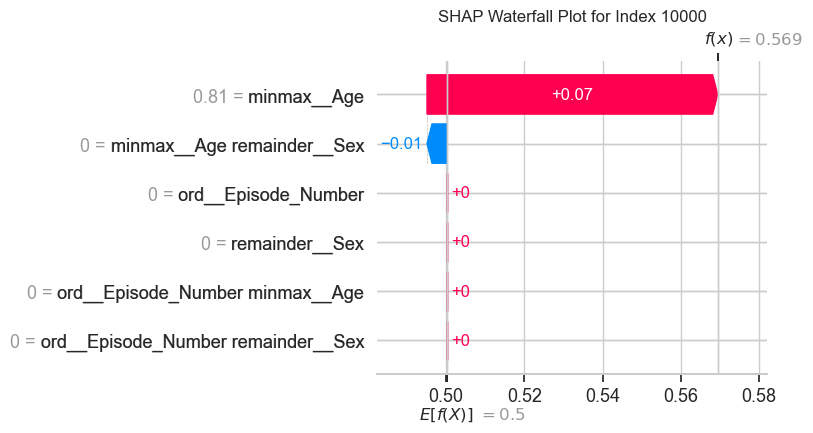

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/shap/plots/_force_matplotlib.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


<Figure size 640x480 with 0 Axes>

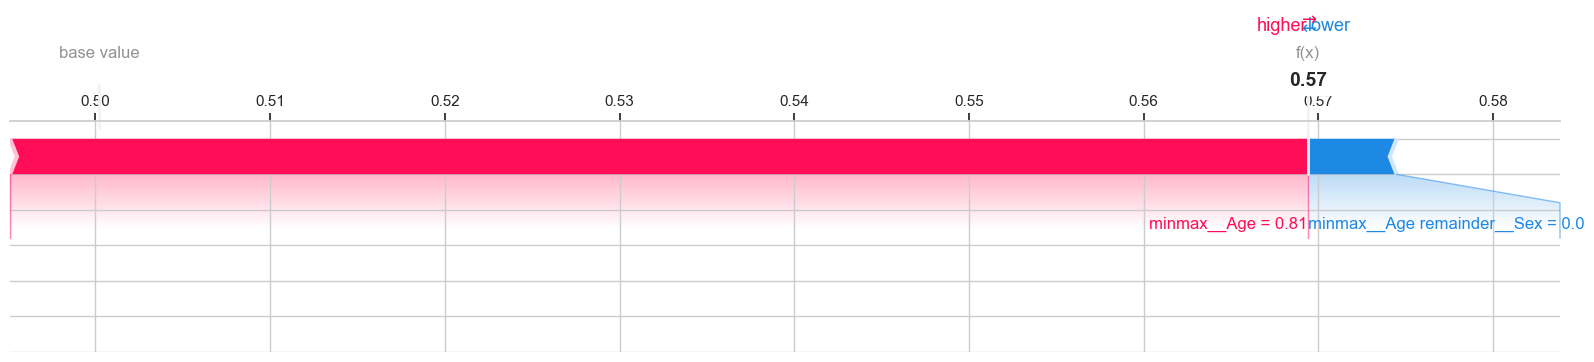

Force plot saved at /Users/yzc/Desktop/Fall-2024/DATA-1030/Project/Plot/shap_force_index_10000.png

Generating plots for index 20000...
Waterfall plot saved at /Users/yzc/Desktop/Fall-2024/DATA-1030/Project/Plot/shap_waterfall_index_20000.png


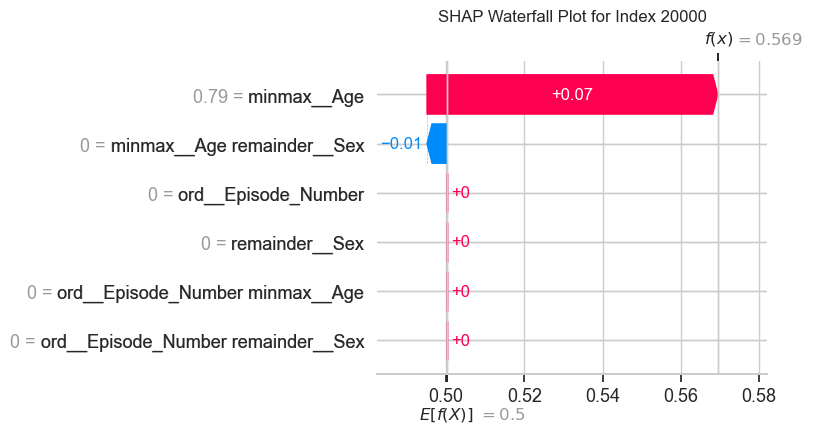

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/shap/plots/_force_matplotlib.py:101: RuntimeWarning: divide by zero encountered in scalar divide
  feature_contribution = np.abs(float(feature[0]) - pre_val) / np.abs(total_effect)


<Figure size 640x480 with 0 Axes>

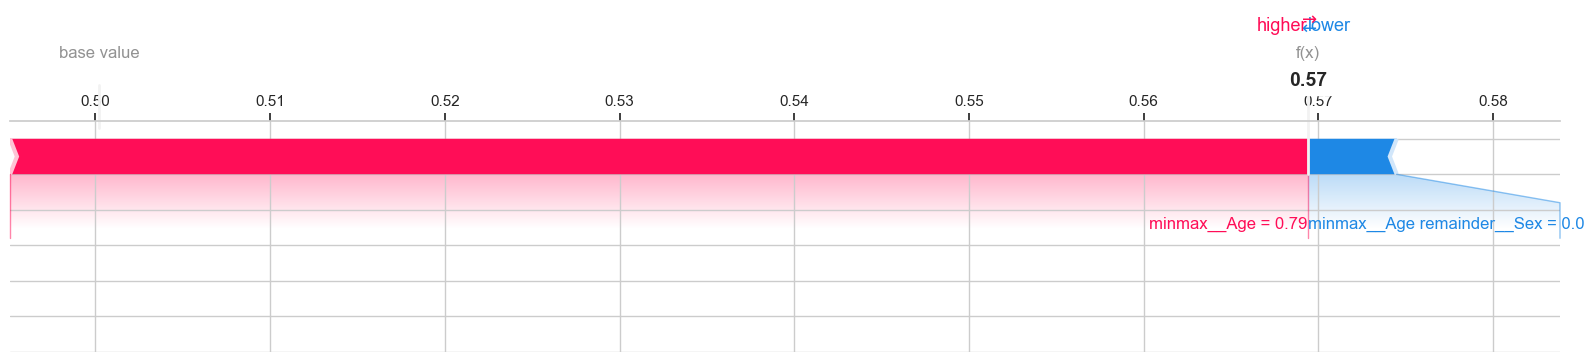

Force plot saved at /Users/yzc/Desktop/Fall-2024/DATA-1030/Project/Plot/shap_force_index_20000.png


In [851]:
import os
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Define indices of the specific data points to analyze
indices = [10000, 20000]
shap.initjs()

# Ensure feature names and transformed data are properly handled
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)  # Convert to DataFrame for better compatibility

# Directory to save plots
save_dir = os.path.join(os.path.expanduser("~"), "Desktop", "Fall-2024", "DATA-1030", "Project", "Plot")
os.makedirs(save_dir, exist_ok=True)

# Loop through the indices and generate/save force plots and waterfall plots
for index in indices:
    print(f"\nGenerating plots for index {index}...")

    # SHAP values for the specific observation and class 0
    # shap_values_obs = shap_values[class_index][index, :]
    shap_values_obs = shap_values[index, :, 0]  # Correct class 0 selection

    # Create the SHAP explanation object
    explanation = shap.Explanation(
        values=shap_values_obs,
        base_values=explainer.expected_value[class_index],  # Expected value for class 0
        data=X_poly_df.iloc[index, :],
        feature_names=poly_feature_names
    )

    # Generate and save the waterfall plot
    plt.figure()
    shap.plots.waterfall(explanation, show=False)
    plt.title(f"SHAP Waterfall Plot for Index {index}")
    plt.tight_layout()

    # Save the waterfall plot
    waterfall_path = os.path.join(save_dir, f"shap_waterfall_index_{index}.png")
    plt.savefig(waterfall_path, format='png', dpi=300, bbox_inches='tight')
    print(f"Waterfall plot saved at {waterfall_path}")
    plt.show()
    plt.close()

    # Generate and save the force plot
    plt.figure()
    force_fig = shap.force_plot(
        base_value=explainer.expected_value[class_index],  # Expected value for class 0
        shap_values=shap_values_obs,
        features=X_poly_df.iloc[index].values,  # Feature values as array
        feature_names=poly_feature_names,
        matplotlib=True
    )

    # Save the force plot
    force_path = os.path.join(save_dir, f"shap_force_index_{index}.png")
    plt.savefig(force_path, format='png', dpi=300, bbox_inches='tight')
    print(f"Force plot saved at {force_path}")
    plt.close()
